In [ ]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# LOAD DATA
breast = load_breast_cancer()
X = breast.data
y = breast.target
df = pd.DataFrame(X)

In [ ]:
#print(df.head())
#print(breast.DESCR)
#print(breast.feature_names)

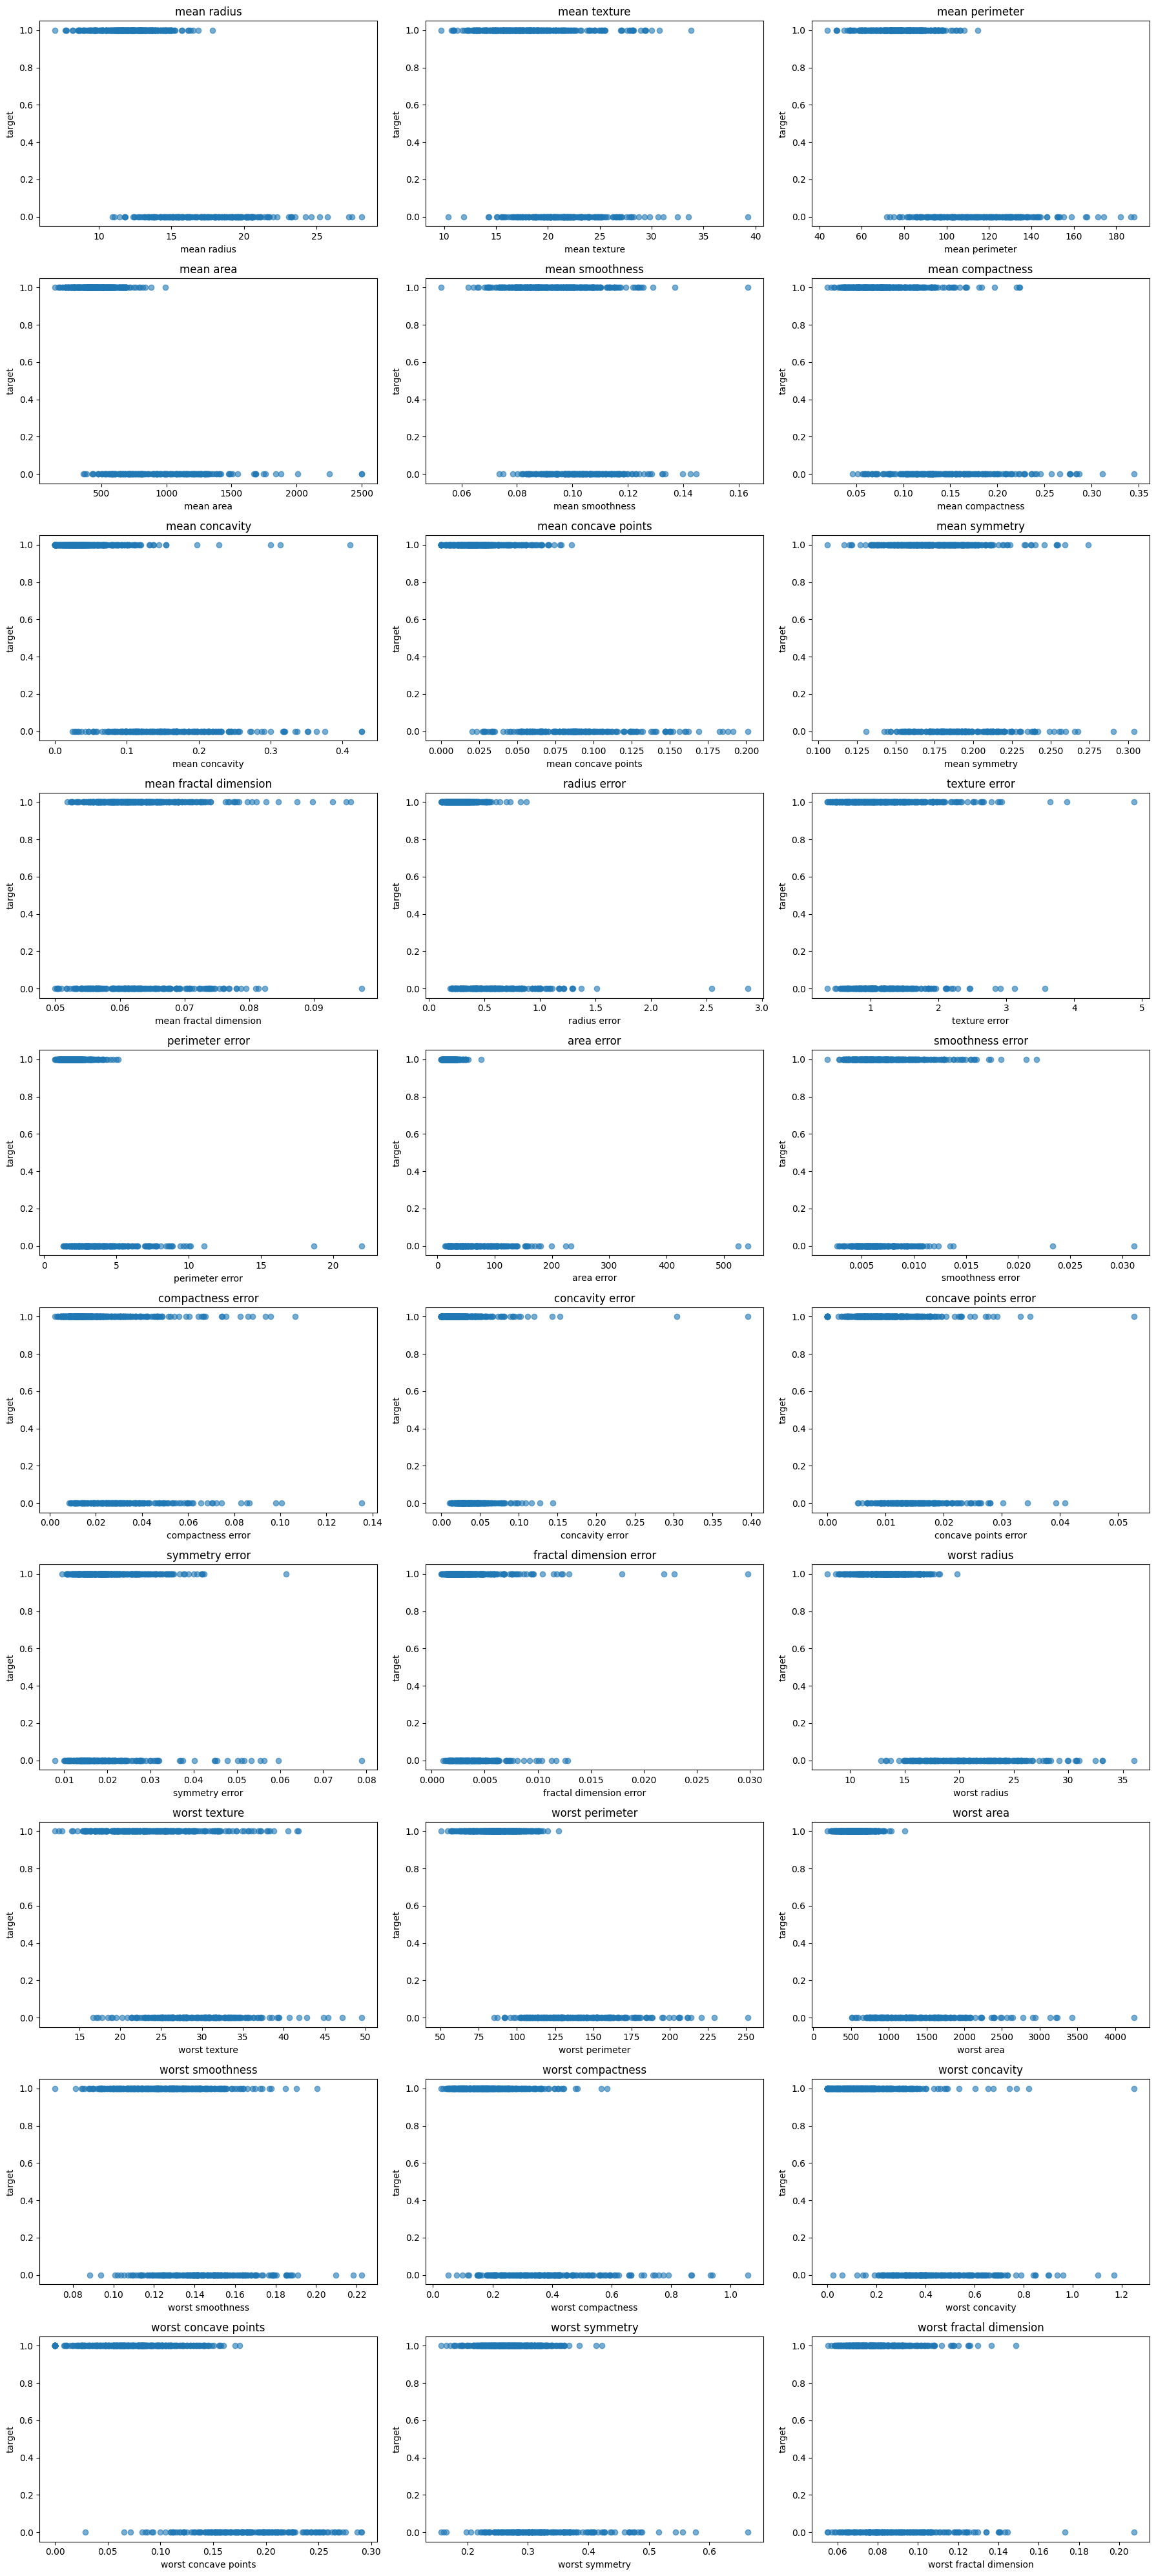

In [ ]:
# VISUALIZE DATA
FEATURES = breast.feature_names

num_features = len(FEATURES)
cols = 3
rows = (num_features + cols - 1) // cols  # ceiling division

plt.figure(figsize=(18, rows * 4))  # adjust figure size as needed

for i in range(num_features):
    plt.subplot(rows, cols, i + 1)
    plt.scatter(df[i], y, alpha=0.6)
    plt.xlabel(FEATURES[i])
    plt.ylabel('target')
    plt.title(FEATURES[i])
    plt.tight_layout()

plt.show()

In [ ]:
# SPLIT FOR TRAINING (80%) AND TESTING (20%)
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=25)

# STANDARDIZE DATA
stdScaler = StandardScaler()
stdScaler.fit(trainX)
trainX = stdScaler.transform(trainX)
testX = stdScaler.transform(testX)

# PROBLEM 1(i) - Logistic Regression (Standardized, but no regularization)
Accuracy: 0.965\
Precision: 0.973\
Recall: 0.923\
F1 Score: 0.947

In [ ]:
# TRAINING CLASSIFICATION MODEL
classifier = LogisticRegression(random_state=25)
classifier.fit(trainX, trainY)

# CREATE PREDICTIONS
predY = classifier.predict(testX)

# PERFORMANCE EVALUATION
cnfMatrix = confusion_matrix(testY, predY)
print(cnfMatrix)

[[36  3]
 [ 1 74]]


Text(0.5, 427.9555555555555, 'Predicted Label')

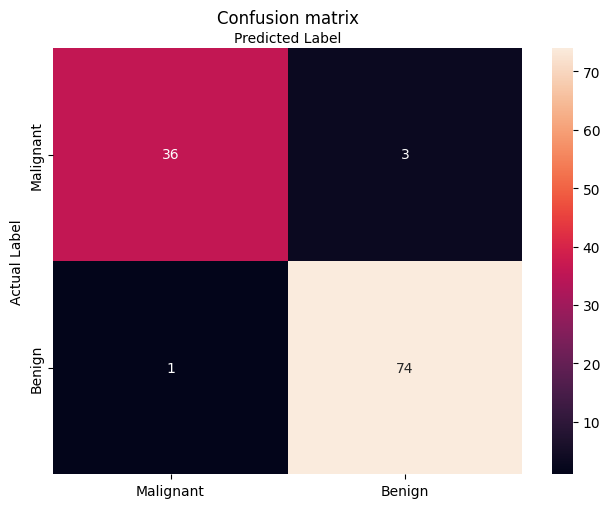

In [ ]:
# GENERATE HEATMAP OF CONFUSION MATRIX
import seaborn as sns
CLASS_NAMES = ['Malignant', 'Benign']
fig, ax = plt.subplots()

# CREATE HEATMAP
sns.heatmap(pd.DataFrame(cnfMatrix), annot = True, fmt='g', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
# EVALUATE PERFORMANCE
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(testY, predY))
print("Precision:", metrics.precision_score(testY, predY, pos_label=0))
print("Recall:", metrics.recall_score(testY, predY, pos_label=0))
print("F1 Score:", metrics.f1_score(testY, predY, pos_label=0))

Accuracy: 0.9649122807017544
Precision: 0.972972972972973
Recall: 0.9230769230769231
F1 Score: 0.9473684210526315


# PROBLEM 1(ii) - Logistic Regression (Standardized, regularization)
Accuracy: 0.973\
Precision: 1.0\
Recall: 0.923\
F1 Score: 0.96

Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9230769230769231
F1 Score: 0.96


Text(0.5, 427.9555555555555, 'Predicted Label')

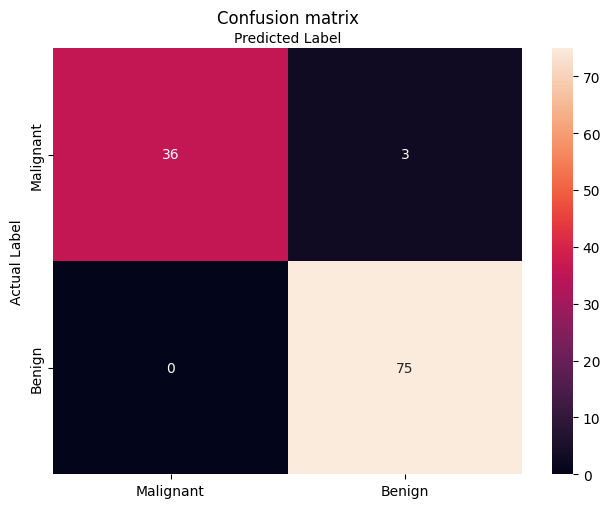

In [ ]:
# CREATE MODEL WITH REGULARIZATION
classifierWithRegL2 = LogisticRegression(penalty='l2', C=0.09, random_state=25)
classifierWithRegL2.fit(trainX, trainY)
predY2 = classifierWithRegL2.predict(testX)

# CHECK METRICS OF MODEL
accLR = metrics.accuracy_score(testY, predY2)
precLR = metrics.precision_score(testY, predY2, pos_label=0)
recLR = metrics.recall_score(testY, predY2, pos_label=0)
F1LR = metrics.f1_score(testY, predY2, pos_label=0)
metricsLR = [accLR, precLR, recLR, F1LR]
print("Accuracy:", accLR)
print("Precision:", precLR)
print("Recall:", recLR)
print("F1 Score:", F1LR)

# CREATE CONFUSION MATRIX
cnfMatrix2 = confusion_matrix(testY, predY2)
fig, ax = plt.subplots()

# PRINT HEATMAP
sns.heatmap(pd.DataFrame(cnfMatrix2), annot = True, fmt='g', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Problem 2(i) - Bayesian Classifier
Accuracy: 0.903\
Precision: 0.833\
Recall: 0.897\
F1 Score: 0.864


Accuracy: 0.9035087719298246
Precision: 0.8333333333333334
Recall: 0.8974358974358975
F1 Score: 0.8641975308641975


Text(0.5, 427.9555555555555, 'Predicted Label')

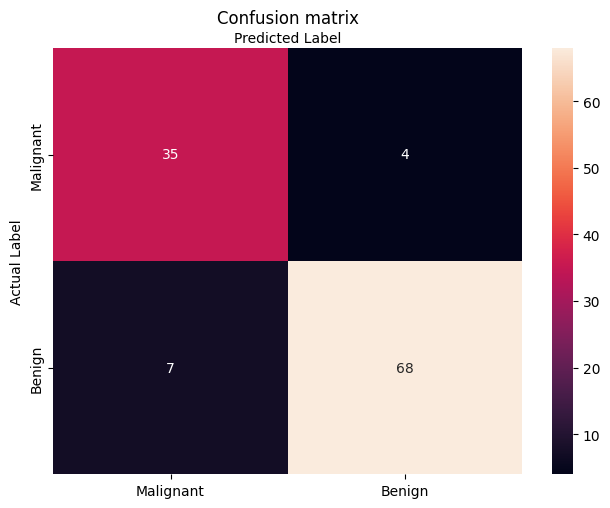

In [ ]:
# CREATE BAYESIAN MODEL
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(trainX, trainY)
predY3 = classifierNB.predict(testX)

# CHECK METRICS OF MODEL
print("Accuracy:", metrics.accuracy_score(testY, predY3))
print("Precision:", metrics.precision_score(testY, predY3, pos_label=0))
print("Recall:", metrics.recall_score(testY, predY3, pos_label=0))
print("F1 Score:", metrics.f1_score(testY, predY3, pos_label=0))

# GENERATE CONFUSION MATRIX HEATMAP
cnfMatrix3 = confusion_matrix(testY, predY3)
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnfMatrix3), annot = True, fmt='g', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# PROBLEM 2(ii) - BAYESIAN CLASSIFIER WITH PLOTTED METRICS AND COMPARISON WITH LOGISTIC REGRESSION

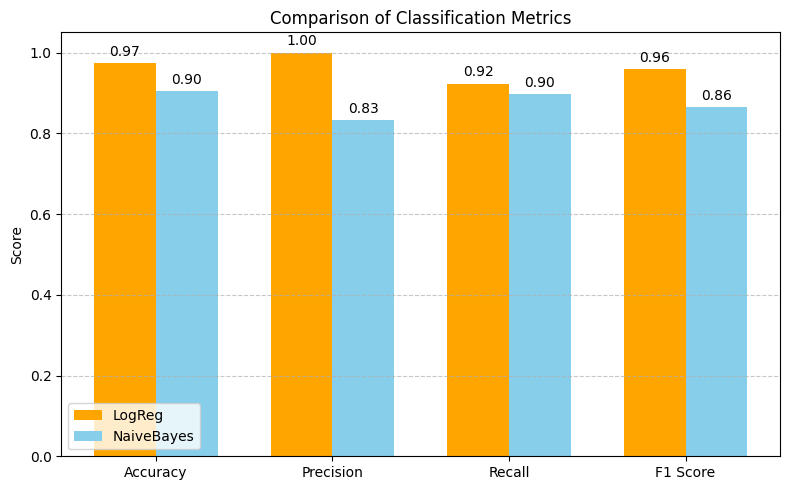

In [ ]:
# PLOT METRICS
accNB = metrics.accuracy_score(testY, predY3)
precNB =  metrics.precision_score(testY, predY3, pos_label=0)
recNB = metrics.recall_score(testY, predY3, pos_label=0)
F1NB = metrics.f1_score(testY, predY3, pos_label=0)
metricsNB = [accNB, precNB, recNB, F1NB]
METRICS_LABELS = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Example: metricsLR and metricsNB are both lists of [acc, prec, rec, f1]
x = np.arange(len(METRICS_LABELS))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, metricsLR, width, label='LogReg', color='orange')
bars2 = ax.bar(x + width/2, metricsNB, width, label='NaiveBayes', color='skyblue')

# Add labels
ax.set_ylabel('Score')
ax.set_title('Comparison of Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(METRICS_LABELS)
ax.set_ylim(0, 1.05)
ax.legend()

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()

When comparing logistic regression with regularization to a naive bayesian classifier, the logistic regression performed better. It had an accuracy of +0.07, precision +0.17, recall +0.02, and F1 score +0.1. Bayesian classifiers treat all features as conditionally independent, when this may not be the case. Logistic regression does not rely on this assumption and learns the weights to model the boundary for classification. The logistic regression also had the advantage of regularization to prevent overfitting by shrinking less useful weights in indicating the presence of a malignant growth.

# PROBLEM 3(i) - Support Vector Machine
Accuracy: 0.965\
Precision: 0.973\
Recall: 0.923\
F1 Score: 0.947

Accuracy: 0.9649122807017544
Precision: 0.972972972972973
Recall: 0.9230769230769231
F1 Score: 0.9473684210526315


Text(0.5, 427.9555555555555, 'Predicted Label')

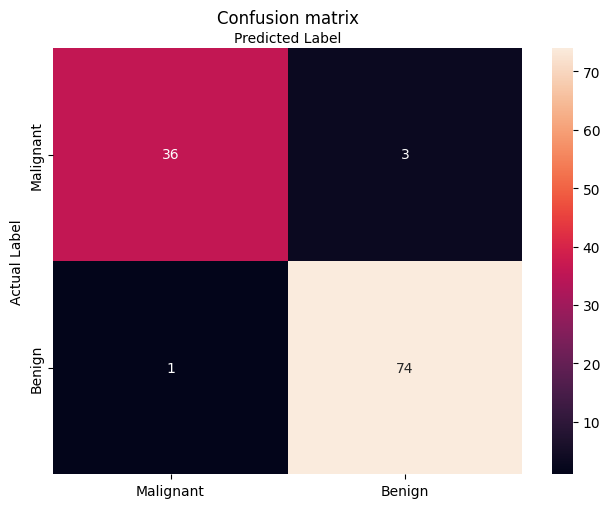

In [ ]:
from sklearn.svm import SVC
classifierSVM = SVC(kernel='linear', C=1.0)
classifierSVM.fit(trainX, trainY)
predY4 = classifierSVM.predict(testX)

# CHECK METRICS OF MODEL
accSVM = metrics.accuracy_score(testY, predY4)
precSVM = metrics.precision_score(testY, predY4, pos_label=0)
recSVM = metrics.recall_score(testY, predY4, pos_label=0)
F1SVM = metrics.f1_score(testY, predY4, pos_label=0)
print("Accuracy:", accSVM)
print("Precision:", precSVM)
print("Recall:", recSVM)
print("F1 Score:", F1SVM)

# GENERATE CONFUSION MATRIX HEATMAP
cnfMatrix4 = confusion_matrix(testY, predY4)
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnfMatrix4), annot = True, fmt='g', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# PROBLEM 3(ii)

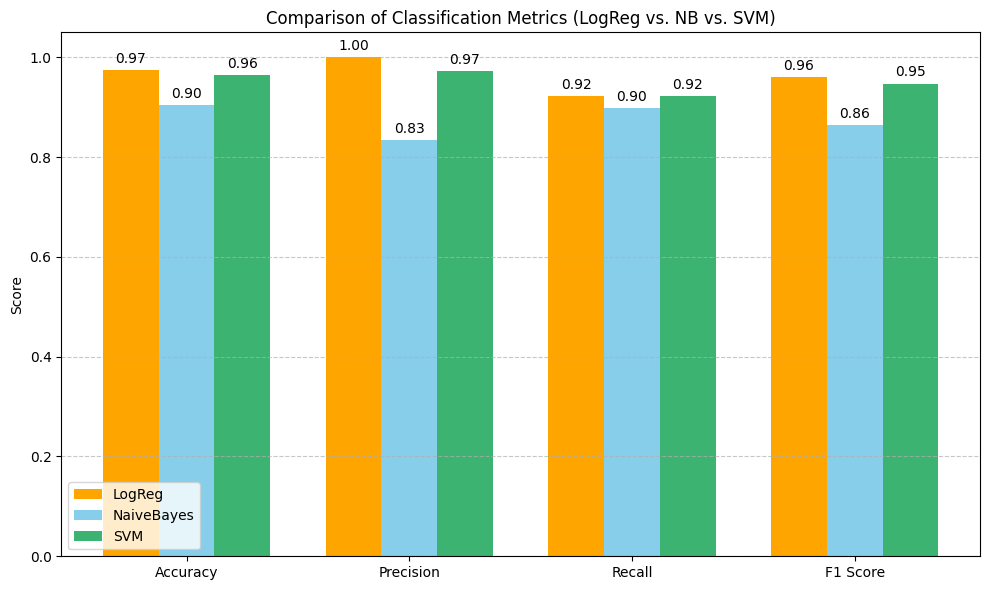

In [ ]:
# PLOT COMPARISON BAR GRAPH OF METRICS
metricsSVM = [accSVM, precSVM, recSVM, F1SVM]
x = np.arange(len(METRICS_LABELS))  # label locations
width = 0.25  # width of each bar

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, metricsLR, width, label='LogReg', color='orange')
bars2 = ax.bar(x, metricsNB, width, label='NaiveBayes', color='skyblue')
bars3 = ax.bar(x + width, metricsSVM, width, label='SVM', color='mediumseagreen')

# Add labels and formatting
ax.set_ylabel('Score')
ax.set_title('Comparison of Classification Metrics (LogReg vs. NB vs. SVM)')
ax.set_xticks(x)
ax.set_xticklabels(METRICS_LABELS)
ax.set_ylim(0, 1.05)
ax.legend()

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()

Between logistic regression with regularization, naive bayesian classification, and a support vector machine, logistic regression had the best performance across all metrics except recall where it tied with the SVM. In this scenario, accuracy and recall are significant values and should be maximized. Recall is a rating of how well the model avoids false negatives. Since this data deals with predicting if breast tissue growth is benign or malignant, a false negative would have drastic consequences and could lead to a patient's harm or death. Logistic regression and the SVM were tied for the best recall score, but logistic regression beat the SVM by accuracy +0.01, precision +0.03, and F1 +0.01. Overall, logistic regression is the better model.

# PROBLEM 4(i) - Principle Component Analysis for Logistic Regression
Accuracy: 0.974\
Precision: 1.0\
Recall: 0.923\
F1 Score: 0.96

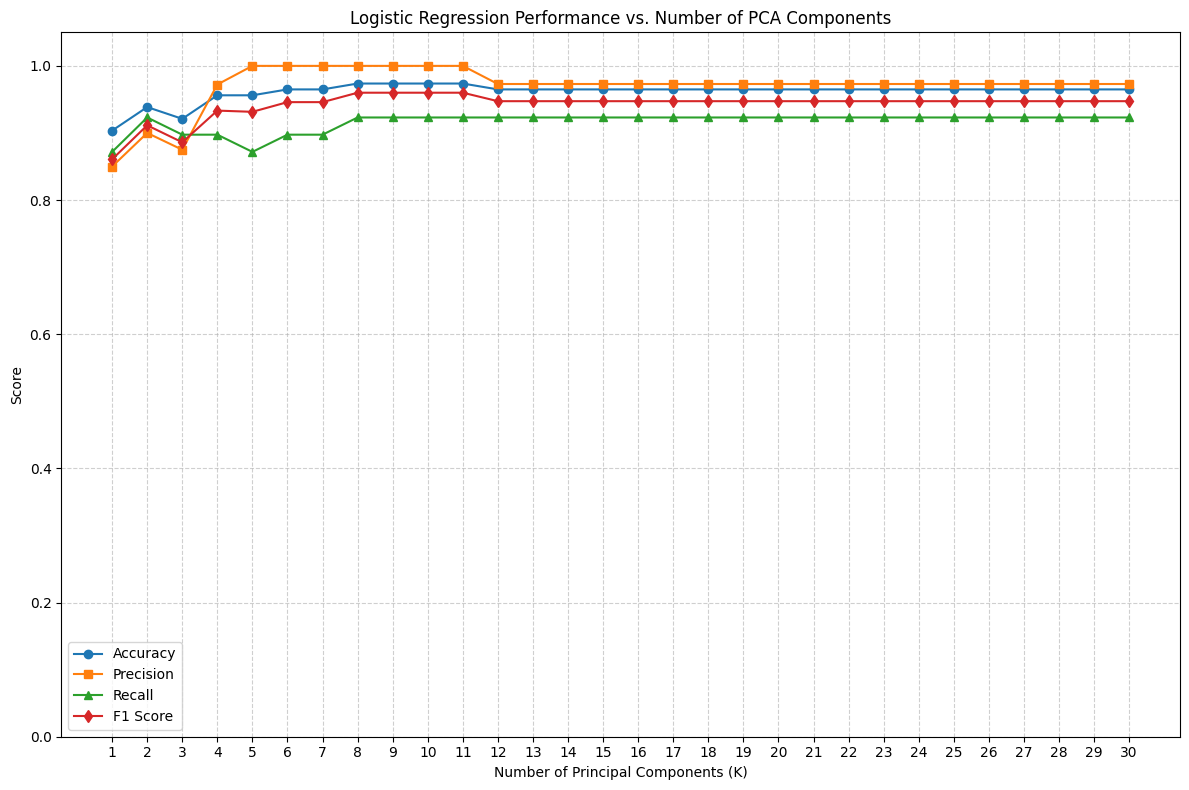

In [ ]:
# IDENTIFY APPROPRIATE k
from sklearn.decomposition import PCA
K_range = range(1, 31)  # Try 1-30 to present the 30 features
accuracies = []
precisions = []
recalls = []
f1_scores = []

for k in K_range:
    # APPLY PCA
    pca = PCA(n_components=k)
    trainX_pca = pca.fit_transform(trainX)
    testX_pca = pca.transform(testX)

    # LOGISTIC REGRESSION
    model = LogisticRegression(random_state=25)
    model.fit(trainX_pca, trainY)
    predY5 = model.predict(testX_pca)

    # STORE RESULTS
    accuracies.append(metrics.accuracy_score(testY, predY5))
    precisions.append(metrics.precision_score(testY, predY5, pos_label=0))
    recalls.append(metrics.recall_score(testY, predY5, pos_label=0))
    f1_scores.append(metrics.f1_score(testY, predY5, pos_label=0))

# PLOT PERFORMANCE PER k
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(K_range, accuracies, label='Accuracy', marker='o')
plt.plot(K_range, precisions, label='Precision', marker='s')
plt.plot(K_range, recalls, label='Recall', marker='^')
plt.plot(K_range, f1_scores, label='F1 Score', marker='d')

plt.title('Logistic Regression Performance vs. Number of PCA Components')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(K_range)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9230769230769231
F1 Score: 0.96


Text(0.5, 427.9555555555555, 'Predicted Label')

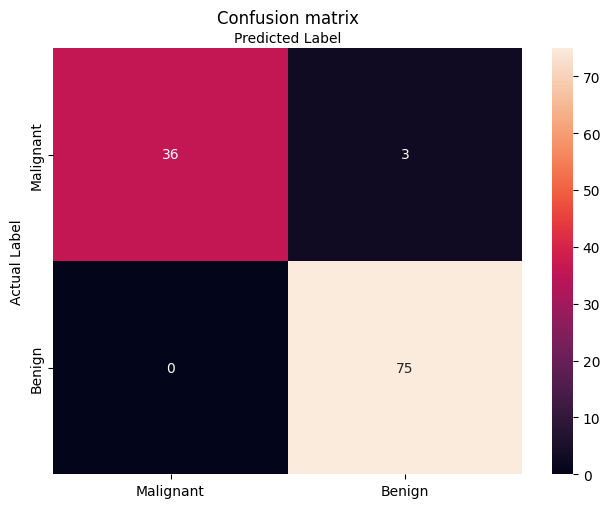

In [ ]:
# APPLY PCA WITH k=8 AND TRAIN MODEL
pca = PCA(n_components=8)
trainX_pca = pca.fit_transform(trainX)
testX_pca = pca.transform(testX)
model = LogisticRegression(random_state=25)
model.fit(trainX_pca, trainY)
predY5 = model.predict(testX_pca)

# CHECK METRICS OF MODEL
accPCA = metrics.accuracy_score(testY, predY5)
precPCA = metrics.precision_score(testY, predY5, pos_label=0)
recPCA = metrics.recall_score(testY, predY5, pos_label=0)
F1PCA = metrics.f1_score(testY, predY5, pos_label=0)
metricsPCA = [accPCA, precPCA, recPCA, F1PCA]
print("Accuracy:", accPCA)
print("Precision:", precPCA)
print("Recall:", recPCA)
print("F1 Score:", F1PCA)

# GENERATE CONFUSION MATRIX HEATMAP
cnfMatrix5 = confusion_matrix(testY, predY5)
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnfMatrix5), annot = True, fmt='g', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

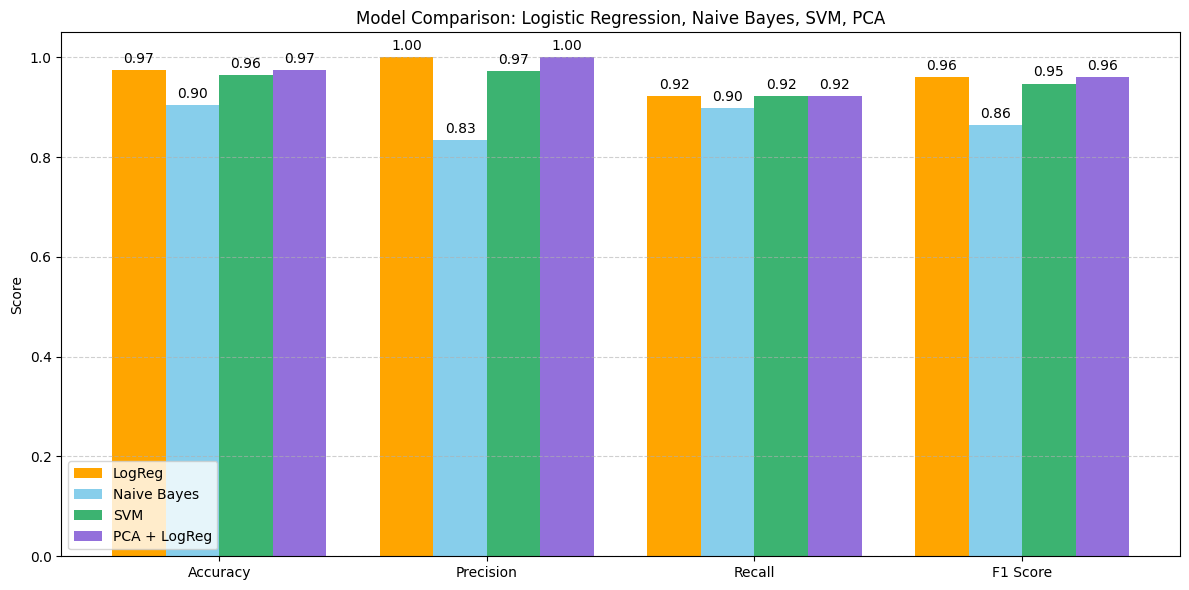

In [ ]:
# PLOT COMPARISON OF ALL FOUR METHODS
x = np.arange(len(METRICS_LABELS))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - 1.5*width, metricsLR, width, label='LogReg', color='orange')
bars2 = ax.bar(x - 0.5*width, metricsNB, width, label='Naive Bayes', color='skyblue')
bars3 = ax.bar(x + 0.5*width, metricsSVM, width, label='SVM', color='mediumseagreen')
bars4 = ax.bar(x + 1.5*width, metricsPCA, width, label='PCA + LogReg', color='mediumpurple')

# Labels and formatting
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Logistic Regression, Naive Bayes, SVM, PCA')
ax.set_xticks(x)
ax.set_xticklabels(METRICS_LABELS)
ax.set_ylim(0, 1.05)
ax.legend()

# Add value labels
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

When comparing logistic regression with regularization, naive bayesian classifier, and logistic regression with PCA, both logistic regression models outperformed the naive bayesian classifier. Both logistic regression models had equal performance across all metrics; however, the model with PCA was able to achieve this performance when reduced to eight principal components comprised of linear combinations of the original thirty features. With the extra processing to perform this though, logistic regression with regularization may be the better option since it requires less preprocessing than with PCA.